In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection  import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA


from scipy import stats
from copy import deepcopy

%matplotlib inline

In [3]:
train = pd.read_csv('../allstate-claims-severity/train.csv')
test = pd.read_csv('../allstate-claims-severity/test.csv')

In [4]:
train.shape, test.shape

((188318, 132), (125546, 131))

In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [7]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [8]:
train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [9]:
## check whether there is any missing value in the dataset
train.isnull().sum().sum()

0

In [10]:
pd.isnull(train).any()

id        False
cat1      False
cat2      False
cat3      False
cat4      False
          ...  
cont11    False
cont12    False
cont13    False
cont14    False
loss      False
Length: 132, dtype: bool

In [11]:
train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

### Observer the data type 

In [12]:
train.info()
# dtypes: float64(15), int64(1), object(116)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [13]:
cat_features = list(train.select_dtypes(include=['object']))

In [14]:
cont_features = [cont for cont in list(train.select_dtypes(include=['float64', 'int64'])) if cont not in ['id', 'loss']]

In [15]:
len(cat_features), len(cont_features)

(116, 14)

In [16]:
id_col = list(train.select_dtypes(include='int64'))
id_col

['id']

In [17]:
train['cat1'].unique()

array(['A', 'B'], dtype=object)

In [18]:
def count_unique_values(df, cat_features):
    dict_unique = {}
    for cat in cat_features:
        dict_unique[cat] = len(df[cat].unique())
    # make it a dataframe
    count_unique_values = pd.DataFrame.from_dict(dict_unique, orient='index').reset_index()
    count_unique_values.columns = ['cat_name', 'unique_values']

    return count_unique_values

In [19]:
uv_df = count_unique_values(train, cat_features)

In [20]:
uv_df.unique_values.value_counts()

2      72
4      12
7       4
3       4
8       3
5       3
16      2
19      2
17      2
20      2
131     1
23      1
61      1
51      1
13      1
84      1
11      1
9       1
15      1
326     1
Name: unique_values, dtype: int64

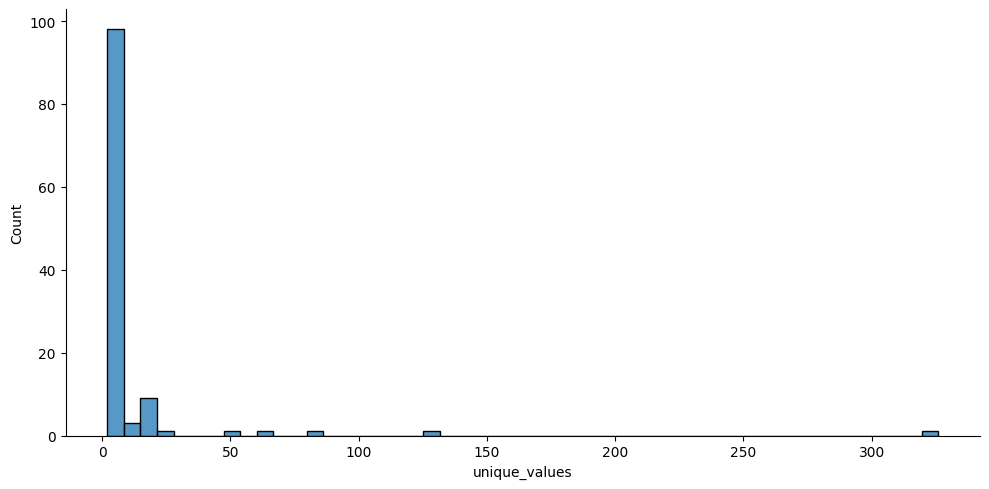

In [21]:
# sns.displot(uv_df['unique_values'], bins=50)

# zoom in to see the distribution
sns.displot(uv_df['unique_values'], bins=50, height=5, aspect=2)
# plt.xlim(-50, 200)
# plt.ylim(0, 100)
plt.show()

Text(7, 70, 'Binary feature')

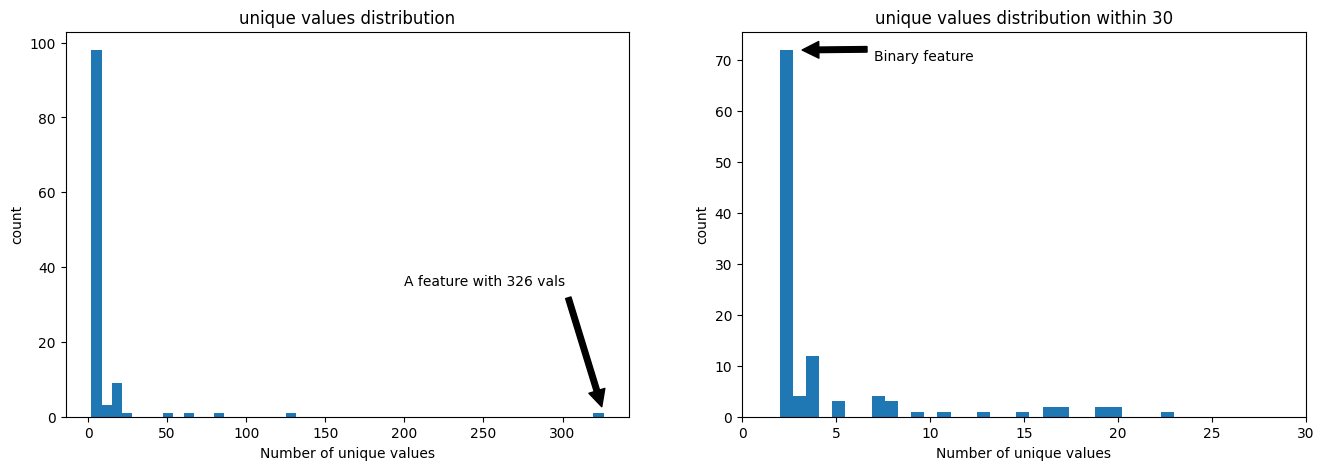

In [22]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(uv_df['unique_values'], bins=50)
ax1.set_title('unique values distribution')
ax1.set_xlabel('Number of unique values')
ax1.set_ylabel('count')
ax1.annotate('A feature with 326 vals', xy=(326, 1), xytext=(200, 35), arrowprops=dict(facecolor='black', shrink=0.05))

# zoom in to see the distribution
ax2.set_xlim(0, 30)
ax2.hist(uv_df[uv_df["unique_values"]<=30].unique_values, bins=30)
ax2.set_title('unique values distribution within 30')
ax2.set_xlabel('Number of unique values')
ax2.set_ylabel('count')
ax2.annotate('Binary feature', xy=(3, 72), xytext=(7, 70), arrowprops=dict(facecolor='black', shrink=0.05))

Most of them have two unique values which followed by the feature which have 4 unique values.

## Target 

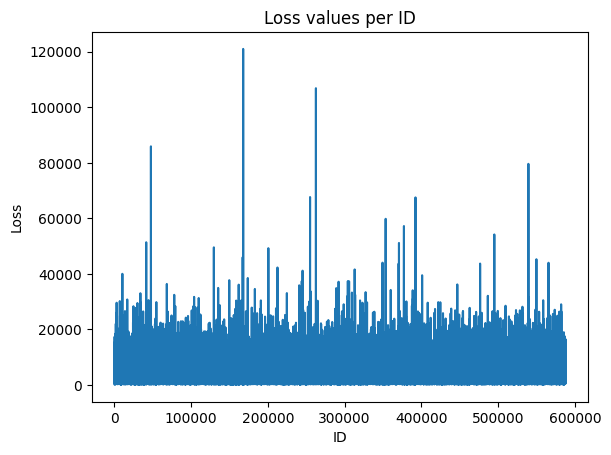

In [23]:
plt.plot(train.id, train.loss)
plt.title('Loss values per ID')
plt.xlabel('ID')
plt.ylabel('Loss')
plt.show()

<Axes: >

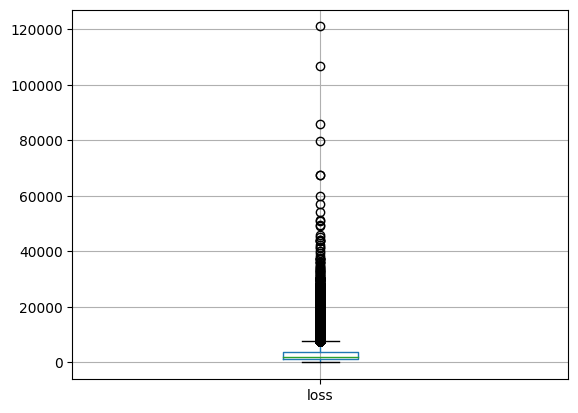

In [24]:
train.boxplot(column='loss')

<Axes: >

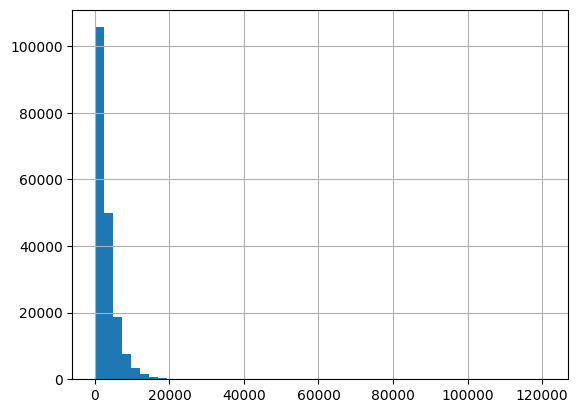

In [25]:
train['loss'].hist(bins=50)

In [26]:
print(f"Skewness: {train.loss.skew():.3f}")
print(f"Kurtosis: {train.loss.kurt():.3f}")

Skewness: 3.795
Kurtosis: 48.080


<Axes: >

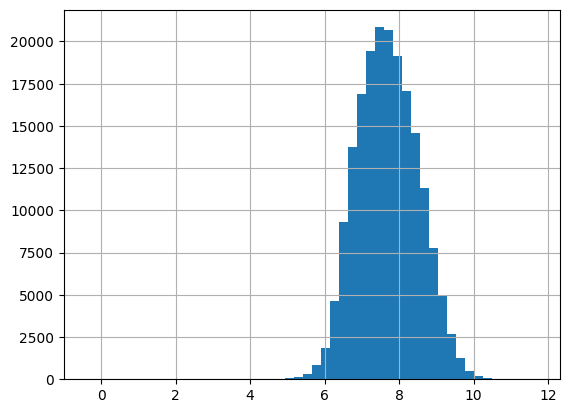

In [27]:
np.log(train['loss']).hist(bins=50)

In [33]:
train.loss = np.log(train.loss)

In [28]:
from scipy.stats import norm, skew

C:\Users\tingf\AppData\Local\Temp\ipykernel_4140\797567345.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loss, fit=norm)


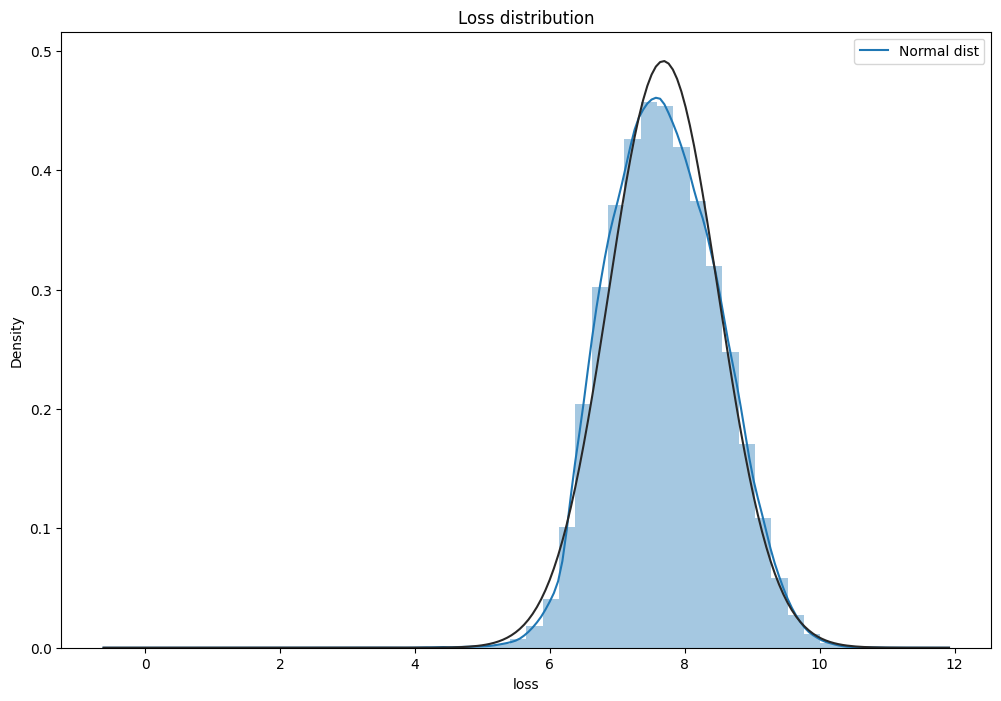

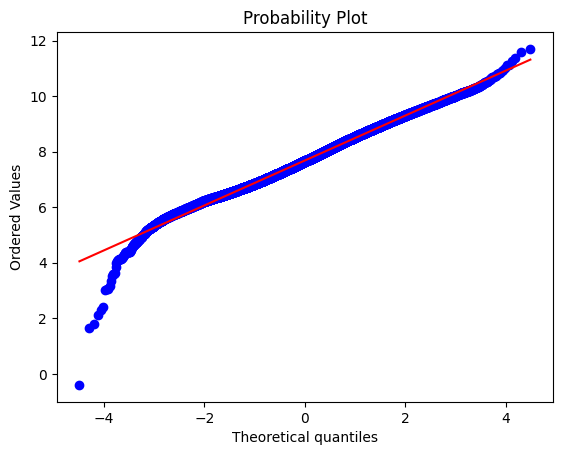

In [34]:
#  check the results
plt.figure(figsize=(12, 8))
sns.distplot(train.loss, fit=norm)
plt.legend(['Normal dist'], loc='best')
plt.title('Loss distribution')

fig = plt.figure()
res = stats.probplot(train['loss'], plot=plt)

### Preprocessing continuous variable

array([[<Axes: title={'center': 'cont1'}>,
        <Axes: title={'center': 'cont2'}>,
        <Axes: title={'center': 'cont3'}>,
        <Axes: title={'center': 'cont4'}>],
       [<Axes: title={'center': 'cont5'}>,
        <Axes: title={'center': 'cont6'}>,
        <Axes: title={'center': 'cont7'}>,
        <Axes: title={'center': 'cont8'}>],
       [<Axes: title={'center': 'cont9'}>,
        <Axes: title={'center': 'cont10'}>,
        <Axes: title={'center': 'cont11'}>,
        <Axes: title={'center': 'cont12'}>],
       [<Axes: title={'center': 'cont13'}>,
        <Axes: title={'center': 'cont14'}>, <Axes: >, <Axes: >]],
      dtype=object)

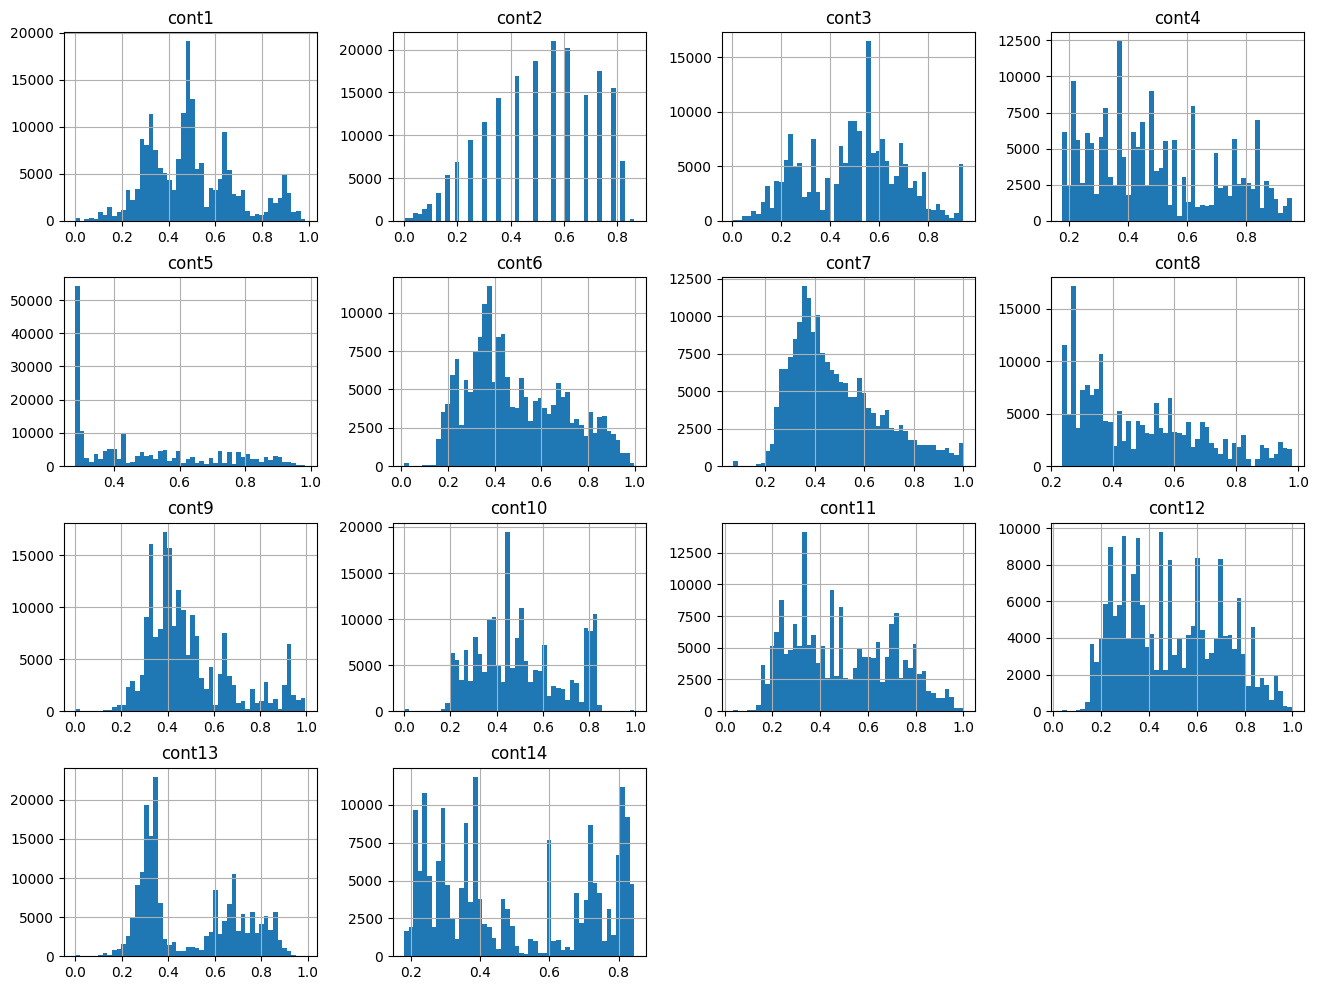

In [35]:
train[cont_features].hist(bins=50, figsize=(16, 12))

### Correlation matrix

<Axes: >

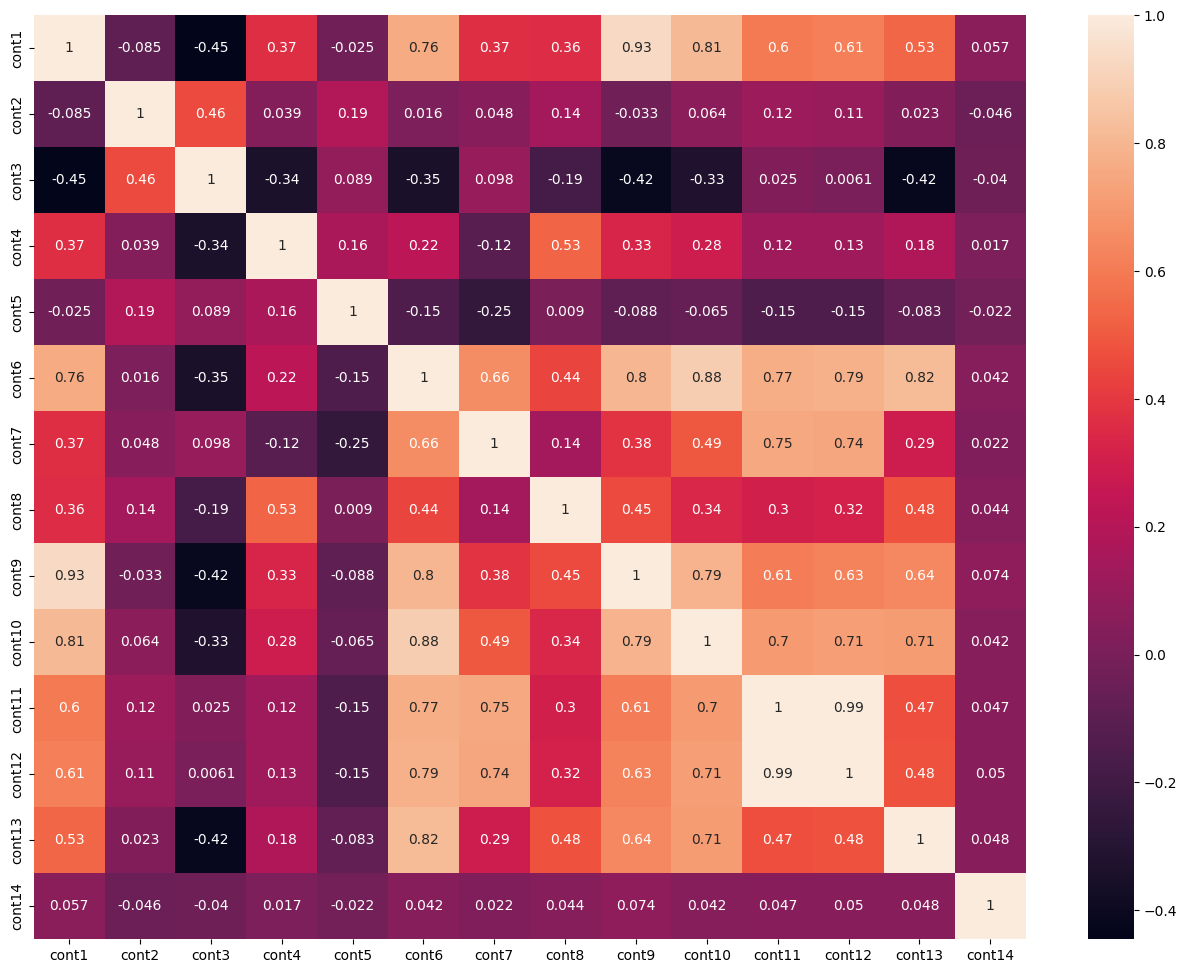

In [36]:
plt.subplots(figsize=(16, 12))
correlation_matrix = train[cont_features].corr()
sns.heatmap(correlation_matrix, annot=True)

We oberserve that the correlation between cont1 and cont9, cont 6 and cont10, cont 11 and cont 12 are high. we will drop cont6, cont9, cont 11.

In [45]:
# drop the features with high correlation
cont_features = [cont for cont in cont_features if cont not in ['cont6', 'cont9', 'cont11']]
cont_features

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont7',
 'cont8',
 'cont10',
 'cont12',
 'cont13',
 'cont14']